1. Make a binary classification dataset with Scikit-Learn's make_moons() function.
For consistency, the dataset should have 1000 samples and a random_state=42.
Turn the data into PyTorch tensors. Split the data into training and test sets using train_test_split with 80% training and 20% testing.

In [311]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

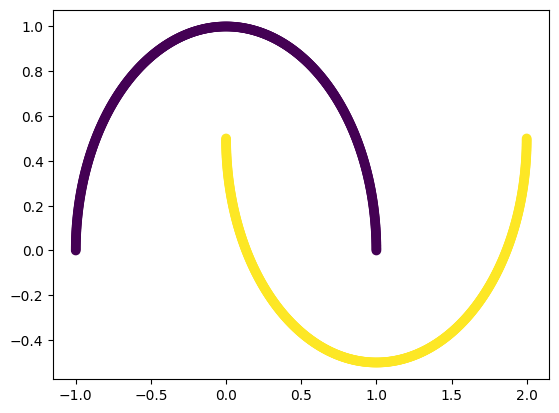

In [312]:
n_samples = 1000
X,y = make_moons(n_samples=n_samples,random_state=42)

# plt.scatter(X,y,c=y)
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [313]:
import torch
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)
X[:4],y[:4]

(tensor([[ 0.0087,  0.3682],
         [ 0.9214, -0.4969],
         [ 0.9402, -0.4982],
         [ 0.4659, -0.3454]]),
 tensor([1., 1., 1., 1.]))

In [314]:
# spliting the data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

2. Build a model by subclassing nn.Module that incorporates non-linear activation functions and is capable of fitting the data you created in 1.
Feel free to use any combination of PyTorch layers (linear and non-linear) you want.

In [315]:
import torch
from torch import nn

In [316]:
# device agnostic
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [317]:
class MoonModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_stack = nn.Sequential(nn.Linear(2,10),
                                         nn.ReLU(),
                                         nn.Linear(10,10),
                                         nn.ReLU(),
                                         nn.Linear(10,1))
    def forward(self,x):
            return self.layer_stack(x)
model = MoonModel().to(device)


3. Setup a binary classification compatible loss function and optimizer to use when training the model.


In [318]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model.parameters(),lr=0.1)

4. Create a training and testing loop to fit the model you created in 2 to the data you created in 1.
  1) To measure model accuracy, you can create your own accuracy function or use the accuracy function in TorchMetrics.
  2) Train the model for long enough for it to reach over 96% accuracy.
  3) The training loop should output progress every 10 epochs of the model's training and test set loss and accuracy

In [319]:
# making a accuracy function
def accuracy_fn(y_true,y_pred):
    correct = torch.eq(y_true,y_pred).sum().item()
    accuracy = correct/len(y_pred) * 100
    return accuracy

In [320]:
# creating a training loop
torch.manual_seed(42)
epochs = 1000

# data to target device
X_train,y_train = X_train.to(device),y_train.to(device)
X_test,y_test = X_test.to(device),y_test.to(device)

for e in range(epochs):
    model.train()
    y_logits = model(X_train).squeeze()
    y_preds = torch.round(torch.sigmoid(y_logits))

    loss = loss_fn(y_logits,y_train)
    acc = accuracy_fn(y_true=y_train,y_pred=y_preds)

    model.zero_grad()

    loss.backward()

    optimizer.step()

    ## testing
    model.eval()
    with torch.inference_mode():
        test_logits = model(X_test).squeeze()
        test_preds = torch.round(torch.sigmoid(test_logits))

        test_loss = loss_fn(test_logits,y_test)
        test_acc = accuracy_fn(y_test,test_preds)
    if e % 100 == 0:
        print(f"Epoch : {e} | Train Loss {loss}, Train Accuracy: {acc}, Test Loss {test_loss},Test Accuracy {test_acc}")

    


Epoch : 0 | Train Loss 0.6953820586204529, Train Accuracy: 36.25, Test Loss 0.6945423483848572,Test Accuracy 49.5
Epoch : 100 | Train Loss 0.38732072710990906, Train Accuracy: 81.375, Test Loss 0.39968085289001465,Test Accuracy 78.0
Epoch : 200 | Train Loss 0.23036877810955048, Train Accuracy: 89.625, Test Loss 0.24603763222694397,Test Accuracy 88.0
Epoch : 300 | Train Loss 0.1825653463602066, Train Accuracy: 92.375, Test Loss 0.19952835142612457,Test Accuracy 90.0
Epoch : 400 | Train Loss 0.14183448255062103, Train Accuracy: 94.25, Test Loss 0.15943095088005066,Test Accuracy 92.5
Epoch : 500 | Train Loss 0.09842590987682343, Train Accuracy: 96.375, Test Loss 0.11220203340053558,Test Accuracy 96.0
Epoch : 600 | Train Loss 0.06269092857837677, Train Accuracy: 98.75, Test Loss 0.07055439800024033,Test Accuracy 98.0
Epoch : 700 | Train Loss 0.039610572159290314, Train Accuracy: 100.0, Test Loss 0.043878696858882904,Test Accuracy 100.0
Epoch : 800 | Train Loss 0.026578115299344063, Train A

5. Make predictions with your trained model and plot them using the plot_decision_boundary() function created in this notebook.

In [321]:
from helper_functions import plot_predictions, plot_decision_boundary

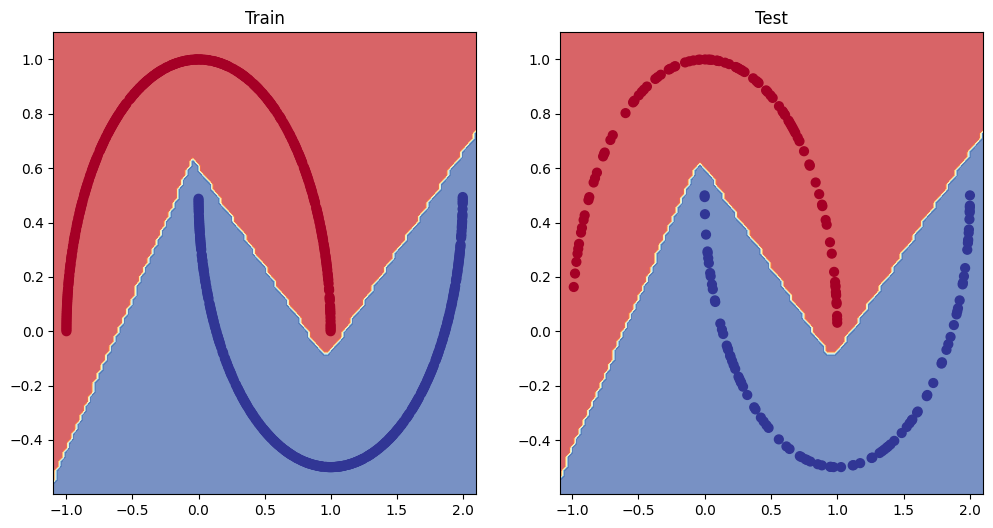

In [322]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model, X_test, y_test)

6. Replicate the Tanh (hyperbolic tangent) activation function in pure PyTorch.

In [323]:
def tanh(x):
    numerator = torch.exp(x) - torch.exp(-x)
    denominatior = torch.exp(x) + torch.exp(-x)
    return numerator/denominatior



In [324]:
A = torch.arange(-10,10,1)
A

tensor([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,   3,
          4,   5,   6,   7,   8,   9])

In [325]:
tanh(A)

tensor([-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9999, -0.9993, -0.9951,
        -0.9640, -0.7616,  0.0000,  0.7616,  0.9640,  0.9951,  0.9993,  0.9999,
         1.0000,  1.0000,  1.0000,  1.0000])

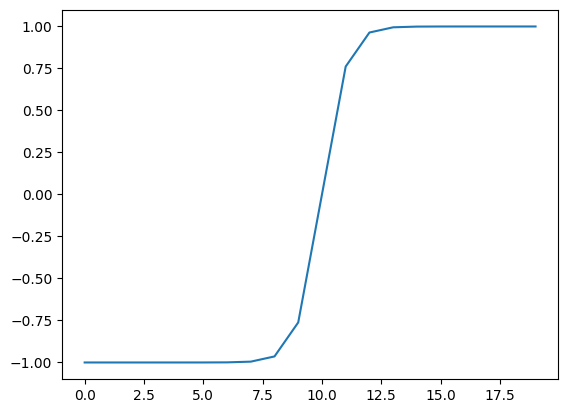

In [326]:
plt.plot(tanh(A))
plt.show()

7. Create a multi-class dataset using the spirals data creation function from CS231n (see below for the code)
   1) Construct a model capable of fitting the data (you may need a combination of linear and non-linear layers).
   2) Build a loss function and optimizer capable of handling multi-class data (optional extension: use the Adam optimizer instead of SGD, you may have to experiment with different values of the learning rate to get it working).
   3) Make a training and testing loop for the multi-class data and train a model on it to reach over 95% testing accuracy (you can use any accuracy measuring function here that you like)
   4) Plot the decision boundaries on the spirals dataset from your model predictions, the plot_decision_boundary() function should work for this dataset too

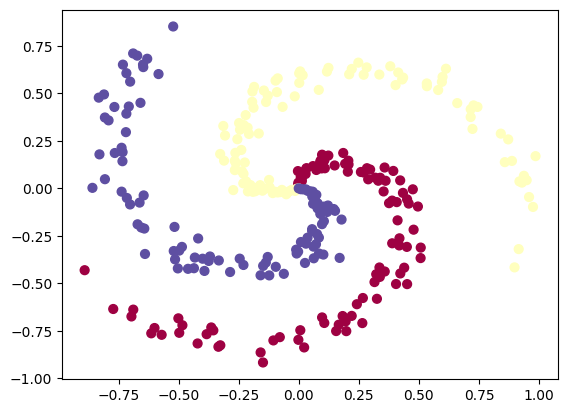

In [327]:
# Code for creating a spiral dataset from CS231n
import numpy as np
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

In [328]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.LongTensor)
X[:5],y[:4]

(tensor([[-0.0000,  0.0000],
         [-0.0045,  0.0091],
         [-0.0026,  0.0200],
         [-0.0015,  0.0303],
         [ 0.0129,  0.0383]]),
 tensor([0, 0, 0, 0]))

In [329]:
# lets split into training and test datasets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
len(X_train),len(X_test),len(y_train),len(y_test)

(240, 60, 240, 60)

In [330]:
class MultiClassification(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_stack = nn.Sequential(nn.Linear(2,10),
                                         nn.ReLU(),
                                         nn.Linear(10,10),
                                         nn.ReLU(),
                                         nn.Linear(10,4))
    def forward(self,x):
        return self.layer_stack(x)
model_1 = MultiClassification().to(device)
model_1


MultiClassification(
  (layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): ReLU()
    (4): Linear(in_features=10, out_features=4, bias=True)
  )
)

In [331]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(),lr=0.01)


In [332]:
## training and testing loop
torch.manual_seed(42)
epochs = 1000

X_train,y_train = X_train.to(device),y_train.to(device)
X_test,y_test = X_test.to(device),y_test.to(device)

for e in range(epochs):
    model_1.train()

    y_logits = model_1(X_train)
    y_preds = torch.softmax(y_logits,dim =1).argmax(dim=1)

    loss = loss_fn(y_logits,y_train)
    acc = accuracy_fn(y_train,y_preds)

    model_1.zero_grad()

    loss.backward()

    optimizer.step()

    ## testing loop 
    model_1.eval()
    with torch.inference_mode():
        test_logits = model_1(X_test)
        test_preds = torch.softmax(test_logits,dim=1).argmax(dim=1)

        test_loss = loss_fn(test_logits,y_test)
        test_acc = accuracy_fn(y_test,test_preds)

    if e % 100 == 0:
        print(f"Epoch : {e} | Train Loss {loss}, Train Accuracy:{acc} , Test Loss {test_loss},Test Accuracy {test_acc} ")




Epoch : 0 | Train Loss 1.3265931606292725, Train Accuracy:19.583333333333332 , Test Loss 1.320954442024231,Test Accuracy 18.333333333333332 
Epoch : 100 | Train Loss 0.6380408406257629, Train Accuracy:66.66666666666666 , Test Loss 0.664971113204956,Test Accuracy 60.0 
Epoch : 200 | Train Loss 0.22257260978221893, Train Accuracy:94.16666666666667 , Test Loss 0.20240235328674316,Test Accuracy 91.66666666666666 
Epoch : 300 | Train Loss 0.13410745561122894, Train Accuracy:95.83333333333334 , Test Loss 0.10211440175771713,Test Accuracy 98.33333333333333 
Epoch : 400 | Train Loss 0.10187115520238876, Train Accuracy:95.83333333333334 , Test Loss 0.08072482794523239,Test Accuracy 98.33333333333333 
Epoch : 500 | Train Loss 0.07549978047609329, Train Accuracy:97.5 , Test Loss 0.06516353040933609,Test Accuracy 96.66666666666667 
Epoch : 600 | Train Loss 0.06529910862445831, Train Accuracy:97.5 , Test Loss 0.05473337322473526,Test Accuracy 98.33333333333333 
Epoch : 700 | Train Loss 0.0554640181

In [339]:
model_1.eval().to(device)
with torch.inference_mode():
    logits = model_1(X_test)
    preds = torch.softmax(logits,dim=1).argmax(dim=1)
preds[:5]

tensor([2, 2, 0, 0, 2], device='cuda:0')

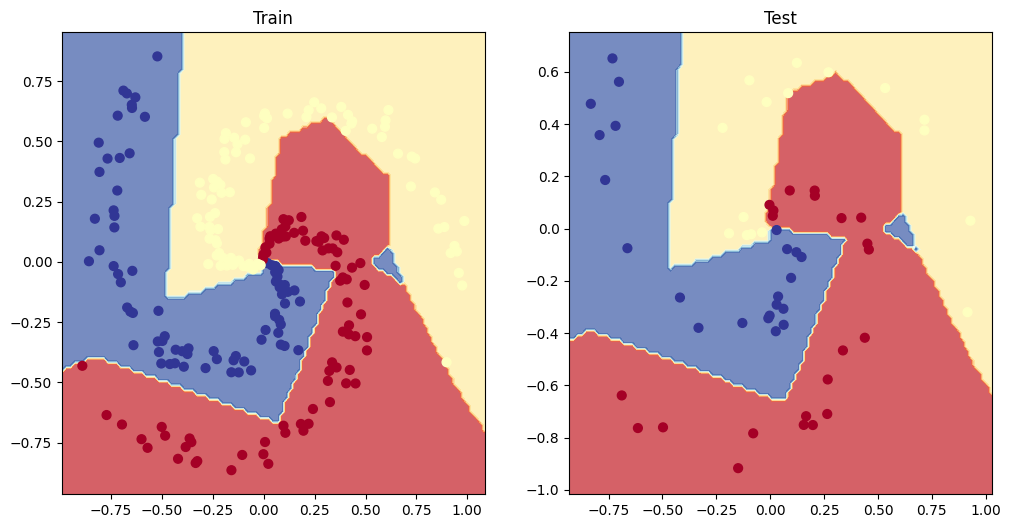

In [334]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)